# B Ağacı

B ağacı, her düğümün <b>birden fazla anahtar</b> içerebildiği ve <b>ikiden fazla çocuğa</b> sahip olabileceği,<br>
<b>kendi kendini dengeleyen</b> özel bir arama ağacı türüdür.<br><br>
İkili arama ağacının genelleştirilmiş bir şeklidir.

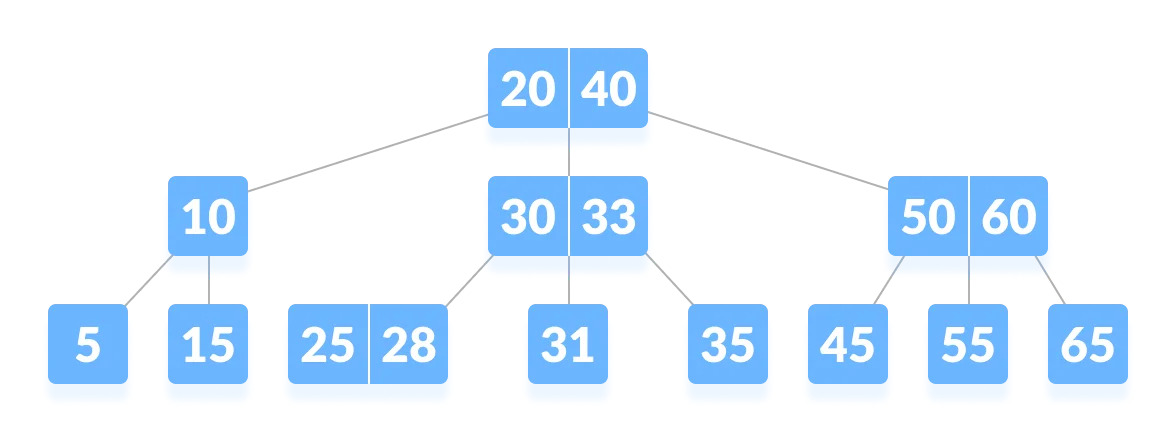

### B Ağacı Özellikleri
    1. Her bir x düğümü için anahtarlar artan sırada saklanır.
    2. Her düğümde, x bir yapraksa doğru olan bir x.leaf bool değeri vardır.
    3. n ağacın sırasıysa, her bir dahili düğüm, her bir alt öğe için bir işaretçiyle birlikte en fazla n - 1 anahtar içerebilir.
    4. Sınırlar: Kök dışındaki her düğümün en fazla n çocuğu ve en az n/2 çocuğu olabilir.
    5. Tüm yapraklar aynı derinliğe sahiptir (yani ağacın yüksekliği - h).
    6. Kökün en az 2 çocuğu vardır ve en az 1 anahtar içerir.
    7. f n ≥ 1, then for any n-key B-tree of height h and minimum degree t ≥ 2, h ≥ logt (n+1)/2.

### B Ağacı İşlemleri
#### B Ağacı'nda Öğe Aramak:
    - Bir B ağacındaki bir elemanı aramak, bir İkili Arama Ağacındaki bir elemanı aramanın genelleştirilmiş şeklidir. Aşağıdaki 5 adım takip edilir.
    
    1. Kök düğümden başlayarak, k'yi düğümün ilk anahtarıyla karşılaştırın.
       k = düğümün ilk anahtarı ise, düğümü ve dizini döndürün.
       
    2. k.leaf = true ise, NULL döndürün.
    
    3. Kök düğümün ilk anahtarı k < ise, bu anahtarın sol alt öğesini yinelemeli olarak arayın.
    
    4. Geçerli düğümde birden fazla anahtar varsa ve k > ilk anahtar varsa, k'yi düğümdeki sonraki anahtarla karşılaştırın.
       k < sonraki anahtar ise, bu anahtarın sol alt öğesini arayın (yani k, birinci ve ikinci anahtarlar arasında yer alır).
       Aksi takdirde, anahtarın doğru çocuğunu arayın.
    
    5. Yaprağa ulaşılana kadar 1'den 4'e kadar olan adımları tekrarlayın.
    
#### B Ağacı'na Öğe Eklemek:
    - B ağacına bir eleman eklemek iki olaydan oluşur: elemanı eklemek için uygun düğümü aramak ve gerekirse düğümü bölmek. Ekleme işlemi her zaman aşağıdan yukarıya yaklaşımda gerçekleşir.
    
    1. Ağaç boşsa, bir kök düğümü atayın ve anahtarı ekleyin.
    
    2. Düğümde izin verilen anahtar sayısını güncelleyin.
    
    3. Eklemek için uygun düğümü arayın.
    
    4. Düğüm doluysa, aşağıdaki adımları izleyin.
    
    5. Öğeleri artan sırada yerleştirin.
    
    6. Şimdi, sınırından daha büyük öğeler var. Yani ortancaya bölün.
    
    7. Ortanca tuşu yukarı doğru itin ve sol tuşları sol çocuk, sağ tuşları sağ çocuk gibi yapın.
    
    8. Düğüm dolu değilse, aşağıdaki adımları izleyin.
    
    9. Düğümü artan sırada yerleştirin.

In [7]:
### Pythonda B Ağacı İşlemi ###
# Searching a key on a B-tree in Python


# Düğüm oluşturma
class BTreeNode:
  def __init__(self, leaf=False):
    self.leaf = leaf
    self.keys = []
    self.child = []


# Ağaç oluşturma
class BTree:
  def __init__(self, t):
    self.root = BTreeNode(True)
    self.t = t

    # Düğüm ekleme
  def insert(self, k):
    root = self.root
    if len(root.keys) == (2 * self.t) - 1:
      temp = BTreeNode()
      self.root = temp
      temp.child.insert(0, root)
      self.split_child(temp, 0)
      self.insert_non_full(temp, k)
    else:
      self.insert_non_full(root, k)

    # Dolu olmayanı ekle
  def insert_non_full(self, x, k):
    i = len(x.keys) - 1
    if x.leaf:
      x.keys.append((None, None))
      while i >= 0 and k[0] < x.keys[i][0]:
        x.keys[i + 1] = x.keys[i]
        i -= 1
      x.keys[i + 1] = k
    else:
      while i >= 0 and k[0] < x.keys[i][0]:
        i -= 1
      i += 1
      if len(x.child[i].keys) == (2 * self.t) - 1:
        self.split_child(x, i)
        if k[0] > x.keys[i][0]:
          i += 1
      self.insert_non_full(x.child[i], k)

    # Çocukları böl
  def split_child(self, x, i):
    t = self.t
    y = x.child[i]
    z = BTreeNode(y.leaf)
    x.child.insert(i + 1, z)
    x.keys.insert(i, y.keys[t - 1])
    z.keys = y.keys[t: (2 * t) - 1]
    y.keys = y.keys[0: t - 1]
    if not y.leaf:
      z.child = y.child[t: 2 * t]
      y.child = y.child[0: t - 1]

  # Ağacı yazdır
  def print_tree(self, x, l=0):
    print("Level ", l, " ", len(x.keys), end=":")
    for i in x.keys:
      print(i, end=" ")
    print()
    l += 1
    if len(x.child) > 0:
      for i in x.child:
        self.print_tree(i, l)

  # Anahtarı ağaçta ara
  def search_key(self, k, x=None):
    if x is not None:
      i = 0
      while i < len(x.keys) and k > x.keys[i][0]:
        i += 1
      if i < len(x.keys) and k == x.keys[i][0]:
        return (x, i)
      elif x.leaf:
        return None
      else:
        return self.search_key(k, x.child[i])
      
    else:
      return self.search_key(k, self.root)


def main():
  B = BTree(3)

  for i in range(10):
    B.insert((i, 2 * i))

  B.print_tree(B.root)

  if B.search_key(8) is not None:
    print("\nFound")
  else:
    print("\nNot Found")


if __name__ == '__main__':
  main()



Level  0   2:(2, 4) (5, 10) 
Level  1   2:(0, 0) (1, 2) 
Level  1   2:(3, 6) (4, 8) 
Level  1   4:(6, 12) (7, 14) (8, 16) (9, 18) 

Found


In [6]:
# Searching a key on a B-tree in Python


# Create a node
class BTreeNode:
  def __init__(self, leaf=False):
    self.leaf = leaf
    self.keys = []
    self.child = []


# Tree
class BTree:
  def __init__(self, t):
    self.root = BTreeNode(True)
    self.t = t

    # Insert node
  def insert(self, k):
    root = self.root
    if len(root.keys) == (2 * self.t) - 1:
      temp = BTreeNode()
      self.root = temp
      temp.child.insert(0, root)
      self.split_child(temp, 0)
      self.insert_non_full(temp, k)
    else:
      self.insert_non_full(root, k)

    # Insert nonfull
  def insert_non_full(self, x, k):
    i = len(x.keys) - 1
    if x.leaf:
      x.keys.append((None, None))
      while i >= 0 and k[0] < x.keys[i][0]:
        x.keys[i + 1] = x.keys[i]
        i -= 1
      x.keys[i + 1] = k
    else:
      while i >= 0 and k[0] < x.keys[i][0]:
        i -= 1
      i += 1
      if len(x.child[i].keys) == (2 * self.t) - 1:
        self.split_child(x, i)
        if k[0] > x.keys[i][0]:
          i += 1
      self.insert_non_full(x.child[i], k)

    # Split the child
  def split_child(self, x, i):
    t = self.t
    y = x.child[i]
    z = BTreeNode(y.leaf)
    x.child.insert(i + 1, z)
    x.keys.insert(i, y.keys[t - 1])
    z.keys = y.keys[t: (2 * t) - 1]
    y.keys = y.keys[0: t - 1]
    if not y.leaf:
      z.child = y.child[t: 2 * t]
      y.child = y.child[0: t - 1]

  # Print the tree
  def print_tree(self, x, l=0):
    print("Level ", l, " ", len(x.keys), end=":")
    for i in x.keys:
      print(i, end=" ")
    print()
    l += 1
    if len(x.child) > 0:
      for i in x.child:
        self.print_tree(i, l)

  # Search key in the tree
  def search_key(self, k, x=None):
    if x is not None:
      i = 0
      while i < len(x.keys) and k > x.keys[i][0]:
        i += 1
      if i < len(x.keys) and k == x.keys[i][0]:
        return (x, i)
      elif x.leaf:
        return None
      else:
        return self.search_key(k, x.child[i])
      
    else:
      return self.search_key(k, self.root)


def main():
  B = BTree(3)

  for i in range(10):
    B.insert((i, 2 * i))

  B.print_tree(B.root)

  if B.search_key(8) is not None:
    print("\nFound")
  else:
    print("\nNot Found")


if __name__ == '__main__':
  main()

Level  0   2:(2, 4) (5, 10) 
Level  1   2:(0, 0) (1, 2) 
Level  1   2:(3, 6) (4, 8) 
Level  1   4:(6, 12) (7, 14) (8, 16) (9, 18) 

Found
